# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [3]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [4]:
# !pip freeze > requirements.txt

In [5]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

     |████████████████████████████████| 133kB 1.8MB/s 
     |████████████████████████████████| 6.3MB 6.1MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 163kB 30.7MB/s 
     |████████████████████████████████| 880kB 49.2MB/s 
     |████████████████████████████████| 2.0MB 54.8MB/s 
     |████████████████████████████████| 7.5MB 39.9MB/s 
     |████████████████████████████████| 163kB 53.7MB/s 
     |████████████████████████████████| 3.0MB 48.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 368kB 53.0MB/s 
     |████████████████████████████████| 29.8MB 144kB/s 
     |████████████████████████████████| 1.1MB 58.3MB/s 
     |████████████████████████████████| 307kB 47.7MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 1.3MB 50.0MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 122kB 45.9MB/s 
 

In [6]:
from P4_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


Importation of modules and packages. 

In [7]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual

import dill

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import * 
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [9]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [10]:
plot_enabled = False
save_enabled = False

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [12]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [13]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

In [14]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio']
prop_C_cols = ['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']

In [15]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [16]:
print_null_pct(df)

nb of null:  3833 
pct of null:  3.6


Showing columns where there are still NaN values

In [17]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
Outlier                          1626
ZipCode                            16
dtype: int64

In [18]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUseWN(kBtu)

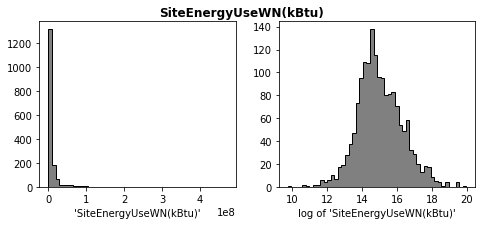

In [19]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUseWN(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUseWN(kBtu)'")
axs[1].hist(df['SiteEnergyUseWN(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUseWN(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUseWN(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

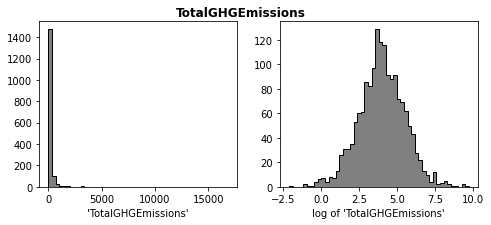

In [20]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 First features selection

#### Quantitative data

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [21]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal',
                               'PropertyGFABuilding(s)',
                               'ExtsurfVolRatio']]

#### Categorical data

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [22]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['LargestPropertyUseType']]

### 1.3 Splitting training and testing set 

In [23]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUseWN(kBtu)']
df_y2 = df['TotalGHGEmissions']

Since 'PrimaryProperty_Type' seems to be the categorical value the most strongly related (seem ppscores in §2.2 of the Cleaning_EDA notebook) to our target features, we split the data with stratification using this column.

In [24]:
X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df['PrimaryPropertyType'],
                                            random_state=14)

In [25]:
y1_log_tr, y1_log_te  = np.log(y1_tr), np.log(y1_te)

Training and testing set for linear regression (avoiding colinearity)

In [26]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

Printing the quantitative and categorical independent columns:

In [27]:
print(f'--- {X_tr.columns.shape[0]} independent columns ---\
\nquantitative ({len(prop_Q_cols)}): {prop_Q_cols},\
\ncategorical ({len(prop_C_cols)}): {prop_C_cols}')

--- 22 independent columns ---
quantitative (13): ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio'],
categorical (9): ['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']


In [28]:
print("--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---\n" ,
      set(X_tr.columns) - set(X_tr_sel.columns))

--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---
 {'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'ExtsurfVolRatio'}


### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('Neighborhood', 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

## 2 First model selection

In [29]:
df_res = pd.DataFrame(dtype = 'object')

### 2.0 Knn Regressor baseline

Training a Knn regressor on the training set and optimizing nb of neighbors with cross-validation grid search. Putting the results in a dataframe for further comparison with other models.

In [31]:
reg = KNeighborsRegressor()
name_reg = 'KNN'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'],
            'KNN__n_neighbors': [1,2,3,5,7,11,17,21]}

knn_gscv, new_df_res = best_model_optimizer(CustEncoder(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_gs=GroupKFold(n_splits=5),
                     groups=X_tr['PrimaryPropertyType'],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error')

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished


,KNN
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'ohe', 'ord', 'stand', 2]"
RMSE,18397494.79
R2,0.34
Adj_R2,0.30
mean_CV_te_RMSE,17298563.92
mean_CV_te_R2,0.27
mean_CV_te_adjR2,-0.11


Plotting the score of knn vs number of k_neighbors on the training set

In [32]:
    # gscv_res = gscv.cv_results_
    # df_gscv = pd.DataFrame(gscv_res)
    # params = df_gscv.columns[df_gscv.columns.str.contains('param_')]

In [33]:
plot_1D_hyperparam_opt(knn_gscv)

ERROR : there is more than one parameter, try smthg else


Plotting the learning curve of knn

Using matplotlib backend: agg


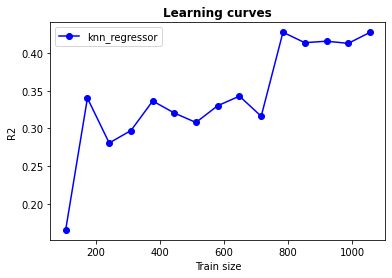

In [34]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,15),
                          scoring="r2", label="knn_regressor",
                          c='b') # , fig = fig
%matplotlib inline
fig

### 2.1 Linear regression - without regularization

In [35]:
df_lr = pd.DataFrame(dtype = 'object')

#### 'SiteEnergyUse(kBtu)' target

With all the features

In [36]:
reg = LinearRegression()
name_reg = 'LinReg(all)'

pipe = make_pipeline(column_trans, reg)
pipe.fit(X_tr,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_te, df_lr, cv=5)

NameError: ignored

With selection of the features, trying to avoid colinearity

In [ ]:
reg = LinearRegression()
name_reg = 'LinReg(sel)'

pipe = make_pipeline(column_trans_sel, reg)
pipe.fit(X_tr_sel,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te_sel, y1_te, df_lr, cv=5)

#### 'SiteEnergyUse(kBtu)_log' target

In [ ]:
reg = LinearRegression()
name_reg = 'LinReg_log(all)'

pipe = make_pipeline(column_trans, reg)
pipe.fit(X_tr,y1_log_tr)

y_pr = pipe.predict(X_te)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_log_te, df_lr, cv=5)

Show all the results

In [ ]:
df_lr

### 2.2 Linear Regularized Regressions

In [ ]:
'''MODELES REGRESSEURS LINEAIRES DANS SKLEARN : 
Lars, LassoLars, ARDRegression, BayesianRidge, SGDRegressor, HuberRegressor,
RANSACRegressor, TheilSenRegressor, TweedieRegressor, GammaRegressor,
PoissonRegressor, PassiveAggressiveRegressor'''

from sklearn.linear_model import *

In [ ]:
# sans optimisation

df_non_opt = pd.DataFrame(dtype = 'object')

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet', 'Lars', 'LassoLars',
                          'ARDRegression', 'BayesianRidge', 'SGDRegressor',
                          'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor',
                          'PassiveAggressiveRegressor',
                          'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor'],
                         [Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
                          ARDRegression(), BayesianRidge(), SGDRegressor(),
                          HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
                          PassiveAggressiveRegressor(),
                          PoissonRegressor(), TweedieRegressor(), GammaRegressor()]):

    pipe = make_pipeline(column_trans, reg)
    pipe.fit(X_tr,y1_tr)

    df_non_opt = get_append_scores(name_reg, pipe, X_te, y1_te, df_non_opt, cv=6)

In [ ]:
df_non_opt

In [ ]:
# optimisation de quelques-uns

dict_param_grid = {'my_Ridge': {'alpha': np.logspace(-1,2,20)},
                   'my_Lasso': {'alpha': np.logspace(5,7,20)},
                   'my_ElasticNet': {'alpha': np.logspace(-6,2,12),
                                     'l1_ratio': [0.15,0.3,0.45,0.6,0.75]}}
li_models = [Ridge(), Lasso(), ElasticNet()]
li_name_models = ['my_Ridge', 'my_Lasso', 'my_ElasticNet']
kf_gscv = KFold(n_splits=5, shuffle=True)

dict_gscv = {}
for reg, name_reg in zip(li_models, li_name_models):
    param_grid = dict_param_grid[name_reg]
    gscv, new_df_res = model_optimizer(name_reg=name_reg,
                                       data_preproc=column_trans,
                                       reg=reg,
                                       param_grid=param_grid,
                                       Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                       cv_gs=kf_gscv, cv_test=6)
    df_res = pd.concat([df_res, new_df_res], axis=1)
    dict_gscv[name_reg] = gscv

df_res

In [ ]:
plt.rcParams['figure.facecolor']='w'

In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Ridge'], log_sc=True)

In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Lasso'], log_sc=True)

In [ ]:
plot_2D_hyperparam_opt(dict_gscv['my_ElasticNet'])

In [ ]:
speak('youpi ce fini')

## 2.3 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

reg = RandomForestRegressor()
name_reg = 'RandomForest'
dict_param_grid = {'RandomForest': {'n_estimators' : [10,50,100,300,500], # nb leaves
                            'min_samples_leaf' : [1,3,5,10]}} # mean nb leaves in a node
                           #'max_features': ['auto', 'sqrt']}} # nb features in a tree
# kf_gscv = KFold(n_splits=5, shuffle=True)

# version unique
rf_gscv, new_df_res = model_optimizer(name_reg=name_reg, data_preproc=column_trans,
                                 reg=reg, param_grid=dict_param_grid[name_reg],
                                 Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                 cv_gs=kf_gscv, cv_test=6)
df_res = pd.concat([df_res, new_df_res], axis=1)

df_res

In [ ]:
rf_gscv.best_params_

In [ ]:
# rf_gscv.best_estimator_.feature_importances_

## 2.4 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR


reg = SVR()
name_reg = 'SVR'
dict_param_grid = {'SVR': {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]}}
# kf_gscv = KFold(n_splits=5, shuffle=True)

# version unique
rf_gscv, new_df_res = model_optimizer(name_reg=name_reg, data_preproc=column_trans,
                                 reg=reg, param_grid=dict_param_grid[name_reg],
                                 Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                 cv_gs=kf_gscv, cv_test=6)
df_res = pd.concat([df_res, new_df_res], axis=1)

df_res

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

## 2.5 XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_estimator_.feature_importances_

In [ ]:
# import dill
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'wb')
# dill.dump(dict_gscv, file)

In [ ]:
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'rb')
# dict_gscv = dill.load(file)